In [1]:
import numpy as np
import sympy as sp

from functools import reduce
from typing import Callable, Iterable

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

from variables import plot_graphic


# Onbayev Baurzhan (15 variant)

In [2]:
def f(x):
    return 2 * np.log(x + 5 ** (1 / 2)) * np.sinh(x)


a = 1
b = 3

x_1 = 1.24
x_2 = 1.97
x_3 = 2.54

control_x_collection = [x_1, x_2, x_3]
x_collection = [a + k * (b - a) / 4 for k in range(1, 5)]


# task 1

In [3]:
# polynom - будем хранить коэффициенты слева направо по убыванию степени икса


from re import L


class task_1:
    def __init__(self, x_collection: Iterable, f: Callable) -> None:
        self.x_collection = x_collection
        self.func = f
        self.y_collection = [f(x) for x in x_collection]

    @staticmethod
    def pol_prod(a, b):
        """
        params:
            a, b - polynoms coefficients
        returns:
            c - a * b polynom coefficients
        """
        size_a = len(a)
        size_b = len(b)
        size_c = size_a + size_b - 1
        c = [0.0] * size_c
        for i in range(size_a):
            for j in range(size_b):
                c[i + j] += a[i] * b[j]
        return c

    @staticmethod
    def pol_sum(a, b):
        """
        params:
            a, b - polynoms coefficients
        returns:
            c - a + b polynom coefficients
        """
        size_a = len(a)
        size_b = len(b)
        max_len = max(size_a, size_b)
        min_len = min(size_a, size_b)
        size_c = max_len
        c = [0.0] * size_c

        if size_a == size_b:
            for i in range(size_c):
                c[i] = a[i] + b[i]
            return c

        arr = a if size_a < size_b else b
        c_ = [0.0] * (max_len - min_len) + [el for el in arr]
        for i in range(size_c):
            x = a[i] if size_a > size_b else b[i]
            c[i] = c_[i] + x
        return c

    @staticmethod
    def take_derivative(w):
        """
        params:
            w - polynom coefficients (от макс степени к мин степени)
        returns:
            w_ - w polynom-deriviate coefficients (от макс степени к мин степени)
        """
        w_ = np.zeros_like(w)
        size = len(w)
        for i in range(1, size):
            w_[i] = w[i - 1] * (size - i)
        return w_

    @staticmethod
    def f(w, x):
        """
        params:
            w: iterable object - коэффициенты полинома от максимальной степени к минимальной
            x: some number - x value
        returns:
            polynom-function value of x
        """
        size = len(w)
        return sum([w[i] * x ** (size - i) for i in range(size)])

    def count_l_k_var_1(self, k: int):
        w = [1]
        s = 1
        for i in range(len(self.x_collection)):
            if i != k:
                w = task_1.pol_prod(w, [1, -self.x_collection[i]])
                s *= self.x_collection[k] - self.x_collection[i]

        for i, a in enumerate(w):
            w[i] = a / s

        return w

    def count_l_k_var_2(self, k: int):
        w = reduce(
            task_1.pol_prod,
            [[1, -x] for i, x in enumerate(self.x_collection) if i != k],
        )
        w_d = task_1.take_derivative(w)
        s = task_1.f(w_d, self.x_collection[k])
        for i, a in enumerate(w):
            w[i] = a / s
        return w

    def count_L(self):
        if any(
            [
                not hasattr(self, "fund_pol_collection_var_1"),
                not hasattr(self, "fund_pol_collection_var_2"),
            ]
        ):
            self.fund_pol_collection_var_1 = [
                self.count_l_k_var_1(k) for k in range(len(self.x_collection))
            ]
            self.fund_pol_collection_var_2 = [
                self.count_l_k_var_2(k) for k in range(len(self.x_collection))
            ]

    def L(self, x: float, var: int) -> float:
        s = 0
        for i in range(len(self.x_collection)):
            if 1 == var:
                s += self.y_collection[i] * task_1.f(
                    self.fund_pol_collection_var_1[i], x
                )
            if 2 == var:
                s += self.y_collection[i] * task_1.f(
                    self.fund_pol_collection_var_2[i],
                    x,
                )
        return s


In [4]:
c = [1, 2, 3]
d = [4, 5, 6, 5]

task_1.pol_prod(d, c), task_1.pol_sum(d, c)


([4.0, 13.0, 28.0, 32.0, 28.0, 15.0], [4.0, 6, 8, 8])

In [5]:
l = task_1(x_collection, f)
l.x_collection, l.y_collection


([1.5, 2.0, 2.5, 3.0],
 [5.612924222916675, 10.47172869657889, 18.818643755906045, 33.17060303042373])

In [6]:
l.count_L()

In [7]:
a, b, x_collection, [f(x) for x in x_collection], [l.L(x, 1) for x in x_collection], [
    f(x) for x in control_x_collection
], [l.L(x, 1) for x in control_x_collection],


(1,
 3,
 [1.5, 2.0, 2.5, 3.0],
 [5.612924222916675, 10.47172869657889, 18.818643755906045, 33.17060303042373],
 [8.419386334375012, 20.943457393157544, 47.04660938976456, 99.51180909127118],
 [3.9448106021193134, 10.100545557435815, 19.70283991653756],
 [4.5003391634067516, 19.910621439566324, 50.0696751564231])

In [8]:
a, b, x_collection, [f(x) for x in x_collection], [l.L(x, 2) for x in x_collection], [
    f(x) for x in control_x_collection
], [l.L(x, 2) for x in control_x_collection],


(1,
 3,
 [1.5, 2.0, 2.5, 3.0],
 [5.612924222916675, 10.47172869657889, 18.818643755906045, 33.17060303042373],
 [-1.5307975153409026,
  -10.471728696578955,
  18.818643755906105,
  9.046528099206755],
 [3.9448106021193134, 10.100545557435815, 19.70283991653756],
 [23.873239364387903, -11.432005642183809, 20.970310050364137])

In [9]:
for x in x_collection:
    print(f(x), l.L(x, 1))


5.612924222916675 8.419386334375012
10.47172869657889 20.943457393157544
18.818643755906045 47.04660938976456
33.17060303042373 99.51180909127118


In [10]:
for x in x_collection:
    print(f(x), l.L(x, 2))



5.612924222916675 -1.5307975153409026
10.47172869657889 -10.471728696578955
18.818643755906045 18.818643755906105
33.17060303042373 9.046528099206755


In [11]:
v1 = lambda x: l.L(x, 1)
v2 = lambda x: l.L(x, 2)


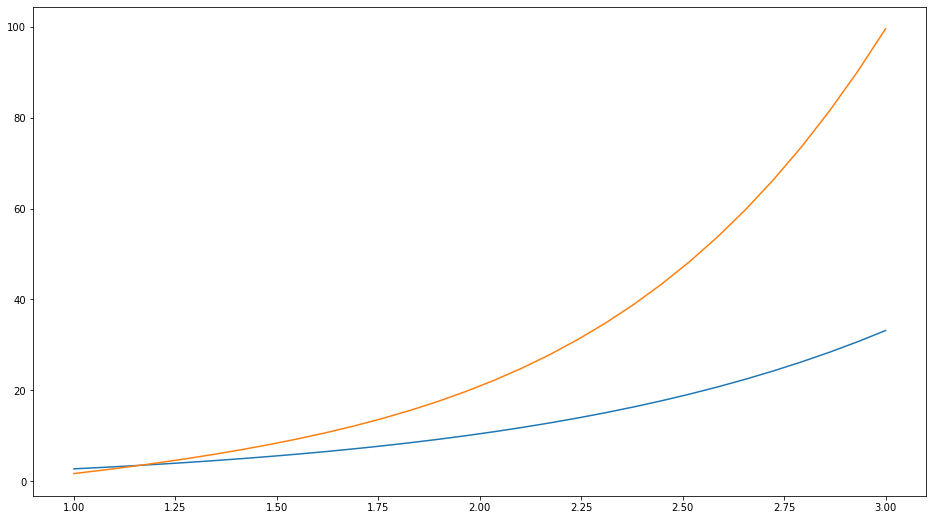

In [12]:
plot_graphic([f, v1], a, b, 30)


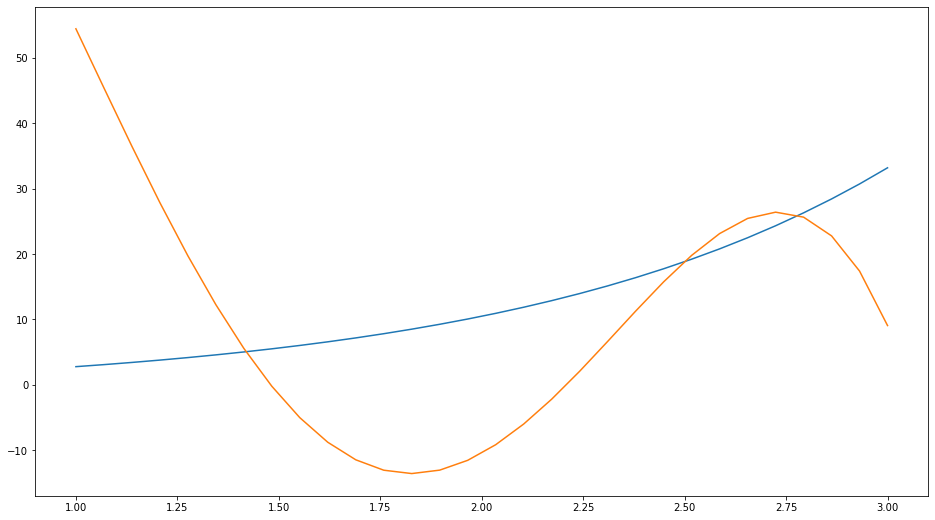

In [13]:
plot_graphic([f, v2], a, b, 30)
